In [32]:
import wave
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


In [33]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq  # Normalize the lowcut frequency
    high = highcut / nyq  # Normalize the highcut frequency
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def low_pass_filter(data, cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        y = filtfilt(b, a, data)
        return y

def high_pass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

In [34]:
with wave.open("single_wheeze_inspire.wav", 'rb') as wav_file:
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    duration = num_frames / fs

    frames = wav_file.readframes(num_frames)

print(num_channels)
audio_data = np.frombuffer(frames, dtype=np.int16)
time_axis = np.linspace(0, num_frames / fs, num=num_frames)
print(audio_data)

1
[   0    0    0 ...   71  -98 -249]


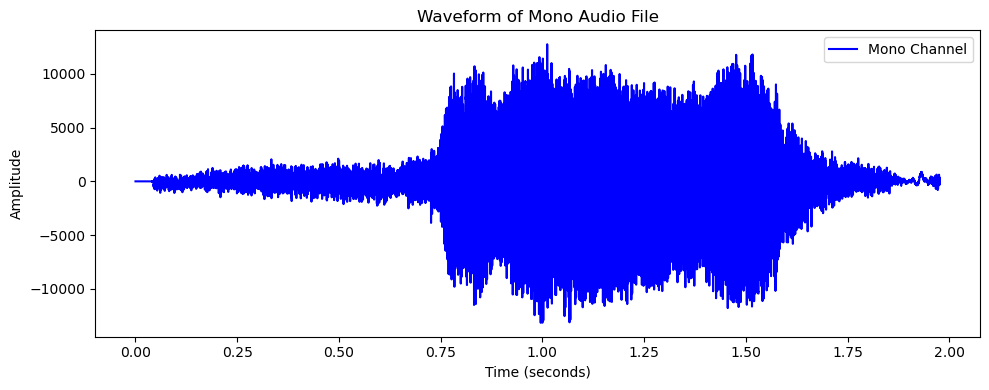

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, label="Mono Channel", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Mono Audio File")
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
audio_data = high_pass_filter(audio_data, 7.5, fs, 1)
audio_data = low_pass_filter(audio_data, (fs/2)-100, fs, 8)
audio_data = bandpass_filter(audio_data, 80, 1600, fs, 4)


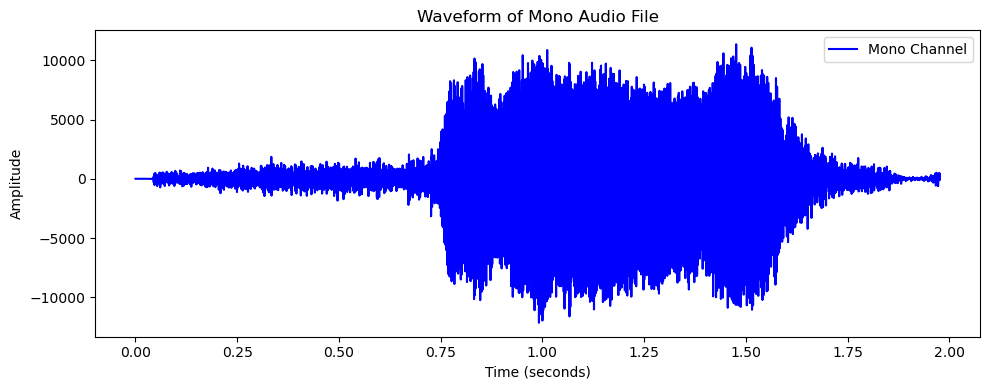

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(time_axis, audio_data, label="Mono Channel", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Mono Audio File")
plt.legend()
plt.tight_layout()
plt.show()

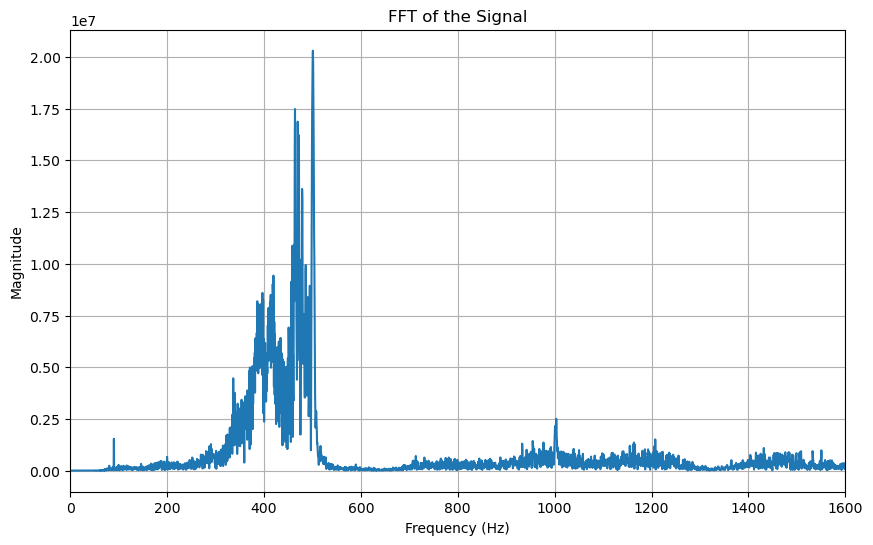

In [38]:
fft_values = np.fft.fft(audio_data)
fft_freq = np.fft.fftfreq(len(audio_data), 1/fs)  # Frequency values for the x-axis

# Take the magnitude of the FFT and plot
magnitude = np.abs(fft_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fft_freq[:len(fft_freq)//2], magnitude[:len(magnitude)//2])  # Only plot positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of the Signal')
plt.xlim(0, 1600)
plt.grid()
plt.show()

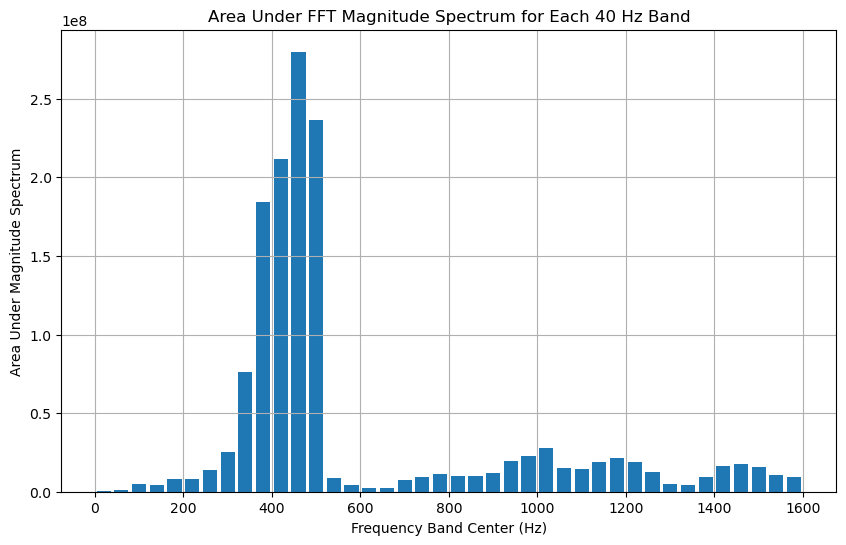

In [39]:
band_width = 40
max_freq = 1600
num_bands = int(max_freq / band_width)
band_areas = []
band_centers = []

for i in range(num_bands):
    # Define band range
    band_start = i * band_width
    band_end = min((i + 1) * band_width, max_freq)
    
    # Mask to select frequency range within the band
    band_mask = (fft_freq >= band_start) & (fft_freq < band_end)
    
    # Calculate area under the magnitude within this band
    band_area = np.trapz(magnitude[band_mask], fft_freq[band_mask])
    band_areas.append(band_area)
    band_centers.append((band_start + band_end) / 2)  # Center frequency of the band

# Plot the area under each band
plt.figure(figsize=(10, 6))
plt.bar(band_centers, band_areas, width=band_width * 0.8, align='center')  # Adjust width for spacing
plt.xlabel('Frequency Band Center (Hz)')
plt.ylabel('Area Under Magnitude Spectrum')
plt.title('Area Under FFT Magnitude Spectrum for Each 40 Hz Band')
plt.grid()
plt.show()

In [42]:
print(band_areas)
df = pd.DataFrame(band_areas, columns=['Power'])
df = df
df.head(50)


[260861.68937515854, 902976.5432145018, 5124628.822235916, 4415696.934141271, 8335453.294713846, 8232014.861853645, 13640641.921233835, 25455133.20143616, 76047091.28814769, 184177653.1473168, 211926616.41728058, 279914517.2617921, 236349617.06297418, 8988983.18351626, 4095397.706661122, 2222800.6085268985, 2272228.4090720084, 7636334.810783411, 9329739.356438858, 11527364.033561148, 9844135.47145844, 10256599.159703197, 12089880.390961455, 19475527.459702868, 22433691.83361648, 27727091.38490815, 14797442.253769645, 14767158.977245955, 19054519.37732021, 21514504.42993201, 19170375.823115863, 12840825.937751355, 5184702.998167617, 4064534.9113283977, 9283369.215079641, 16357689.156231452, 17721287.627131302, 15694937.701692563, 10415906.21141476, 9265070.376741333]


,Powers
0,2.608617e+05
1,9.029765e+05
2,5.124629e+06
3,4.415697e+06
4,8.335453e+06
5,8.232015e+06
6,1.364064e+07
7,2.545513e+07
8,7.604709e+07
9,1.841777e+08
